**Importing libraries**

In [117]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, Input, Dense, Softmax, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

**Define a sub-class of `tensorflow.keras.layers`**

In [118]:
class MyModel(Layer):
    def __init__(self, units=128):
        super(MyModel, self).__init__()
        self.units = units
    
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer='random_normal', trainable=True)
        self.b = self.add_weight(shape=(self.units,), initializer='zeros', trainable=True)
    
    def call(self, inputs):
        return tf.nn.relu(tf.matmul(inputs, self.w)+self.b)

**Model building**

In [119]:
model = Sequential([
    MyModel(128),
    MyModel(10),            # Hidden layer with ReLU activation
    Softmax()               # Output layer with Softmax activation for multi-class classification
])


The **Softmax** activation function is used in the output layer for multi-class classification tasks, ensuring the model outputs probabilities that sum up to 1 for each class, which aligns with categorical cross-entropy as the loss function. This adjustment ensures the model is optimized correctly for multi-class classification.


**Compile the model**

In [120]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

print('Model summary after model building:')
model.build(input_shape=(1000, 20))
model.summary()

Model summary after model building:
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_model_20 (MyModel)       (1000, 128)               2688      
                                                                 
 my_model_21 (MyModel)       (1000, 10)                1290      
                                                                 
 softmax_10 (Softmax)        (1000, 10)                0         
                                                                 
Total params: 3978 (15.54 KB)
Trainable params: 3978 (15.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Train the model**

Train the model on some example data. For this example, you will generate random data for training. In practice, use a real data set. 

Generate the random data

In [121]:
X_train = np.random.random((1000, 20))
y_train = np.random.randint(10, size=(1000, 1))

**Convert the y-data into categorical one-hot encoding**

In [122]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 [==============================] - 1s 8ms/step - loss: 2.3021 - accuracy: 0.1080
Epoch 2/10
32/32 [==============================] - 0s 7ms/step - loss: 2.3005 - accuracy: 0.1130
Epoch 3/10
32/32 [==============================] - 0s 7ms/step - loss: 2.2977 - accuracy: 0.1210
Epoch 4/10
32/32 [==============================] - 0s 8ms/step - loss: 2.2970 - accuracy: 0.1250
Epoch 5/10
32/32 [==============================] - 0s 8ms/step - loss: 2.2953 - accuracy: 0.1330
Epoch 6/10
32/32 [==============================] - 0s 8ms/step - loss: 2.2938 - accuracy: 0.1330
Epoch 7/10
32/32 [==============================] - 0s 9ms/step - loss: 2.2928 - accuracy: 0.1280
Epoch 8/10
32/32 [==============================] - 0s 7ms/step - loss: 2.2914 - accuracy: 0.1320
Epoch 9/10
32/32 [==============================] - 0s 7ms/step - loss: 2.2905 - accuracy: 0.1360
Epoch 10/10
32/32 [==============================] - 0s 8ms/step - loss: 2.2890 - accuracy: 0.1420


**Evaluate model on random test data**

In [123]:
X_test = np.random.random((500, 20))
y_test = np.random.randint(10, size=(500, 1))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}\nAccuracy: {accuracy:.4f}')

16/16 [==============================] - 0s 7ms/step - loss: 2.3122 - accuracy: 0.0800
Loss: 2.3122
Accuracy: 0.0800


**Visualize Model Architecture**

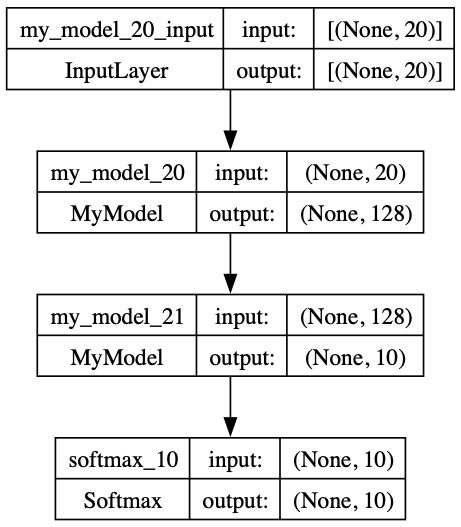

In [124]:
plot_model(model, 
           to_file='model_architecture.jpg',
           show_shapes=True,
           show_layer_names=True,
           dpi=120)

**Adding `Dropout` layer**

In [125]:
model = Sequential([
    MyModel(128),
    Dropout(0.5),
    MyModel(10),
    Softmax()
])
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.build(input_shape=(1000, 20))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_model_22 (MyModel)       (1000, 128)               2688      
                                                                 
 dropout_1 (Dropout)         (1000, 128)               0         
                                                                 
 my_model_23 (MyModel)       (1000, 10)                1290      
                                                                 
 softmax_11 (Softmax)        (1000, 10)                0         
                                                                 
Total params: 3978 (15.54 KB)
Trainable params: 3978 (15.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [126]:
model.fit(X_train, y_train, epochs=10, batch_size=32)
loss, accuracy = model.evaluate(X_test, y_test)

Epoch 1/10
32/32 [==============================] - 0s 8ms/step - loss: 2.3040 - accuracy: 0.0980
Epoch 2/10
32/32 [==============================] - 0s 7ms/step - loss: 2.3018 - accuracy: 0.1060
Epoch 3/10
32/32 [==============================] - 0s 7ms/step - loss: 2.3007 - accuracy: 0.1140
Epoch 4/10
32/32 [==============================] - 0s 7ms/step - loss: 2.3015 - accuracy: 0.1130
Epoch 5/10
32/32 [==============================] - 0s 7ms/step - loss: 2.3017 - accuracy: 0.1140
Epoch 6/10
32/32 [==============================] - 0s 7ms/step - loss: 2.3012 - accuracy: 0.1180
Epoch 7/10
32/32 [==============================] - 0s 7ms/step - loss: 2.3010 - accuracy: 0.1120
Epoch 8/10
32/32 [==============================] - 0s 7ms/step - loss: 2.2995 - accuracy: 0.1190
Epoch 9/10
32/32 [==============================] - 0s 7ms/step - loss: 2.2995 - accuracy: 0.1130
Epoch 10/10
16/16 [==============================] - 0s 7ms/step - loss: 2.3051 - accuracy: 0.0920


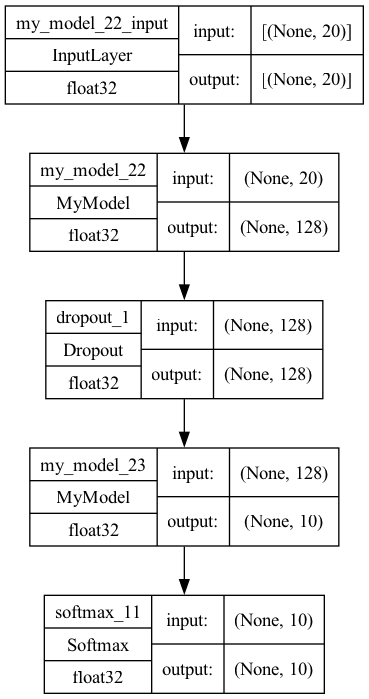

In [127]:
plot_model(model, to_file='model.png', show_dtype=True, show_layer_names=True, show_layer_activations=True, show_shapes=True)